## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

warnings.filterwarnings('ignore')               # Turn the warnings off.

#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [2]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [3]:
len(my_docs), len(y)

(2000, 2000)

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000], dtype=int64))

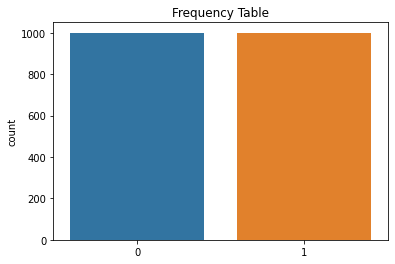

In [5]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [6]:
def cleantxt(txt):
    """
    Cleaning Includes:
    1. remove special characters/symbols
    2. convert text to lower-case
    3. retain only alphabets
    4. remove words less than 3 characters
    5. remove stop-words
    """  
    # collecting english stop words from nltk-library
    stpw = stopwords.words('english')
    stpw = set(stpw)
    
    # using regex to clean the text
    txt = re.sub(b"\n", b" ", txt)
    txt = re.sub(b"[\<\[].*?[\>\]]", b" ", txt)
    txt = txt.lower()
    txt = re.sub(b"[^a-z ]", b" ", txt)
    txt = re.sub(b"\b\w{1,3}\b", b" ",txt)
    txt = b" ".join([x for x in txt.split() if x not in stpw])
    return txt

# Cleaning text
my_docs_cleaned = list(map(lambda x: cleantxt(x), my_docs))
# Converting text from byteslike to string
my_docs_cleaned = [str(doc) for doc in my_docs_cleaned]

2). Create a TF IDF representation.

In [7]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
my_docs_tfidf = vect.fit_transform(my_docs_cleaned)

In [8]:
my_docs_tfidf.shape

(2000, 38567)

In [9]:
my_docs_tfidf = my_docs_tfidf.toarray()

2.1- Splitting dataset

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(my_docs_tfidf, y, test_size=0.15, random_state=42)

3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [35]:
nb = GaussianNB()
train_nb = nb.fit(X_train, Y_train)

y_pred_nb_train = nb.predict(X_train)
y_pred_nb_test = nb.predict(X_test)

In [36]:
print("Training accuracy: %.3f" % (accuracy_score(Y_train, y_pred_nb_train)))
print("Testing accuracy: %.3f" % (accuracy_score(Y_test, y_pred_nb_test)))

Training accuracy: 1.000
Testing accuracy: 0.677


f1 score = 0.694


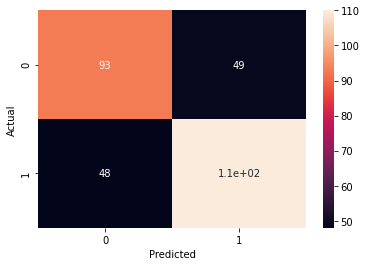

In [37]:
import pandas as pd
print("f1 score = %.3f" % f1_score(Y_test, y_pred_nb_test))

confusion_matrix = pd.crosstab(Y_test, y_pred_nb_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()